
# Hollow Glass Ring in Air

N1 in Bird

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton
from scipy.linalg import null_space

importing NGSolve-6.2.2203-56-g47f483033


In [2]:
n_air = 1.00027717
n_glass = 1.4388164768221814

In [17]:
A = BraggExact(ts=[15e-6,.5*15e-6, 15e-6], mats=['air', 'glass', 'air'], 
               ns=[lambda x:n_air, lambda x:n_glass, lambda x:n_air],
              maxhs=[.2,.03, .1])


In [18]:
k_low = A.k0 * A.ns[0] * A.scale
k_low

52.37439014709314

In [19]:
outer = 'pcb'
nu = 1

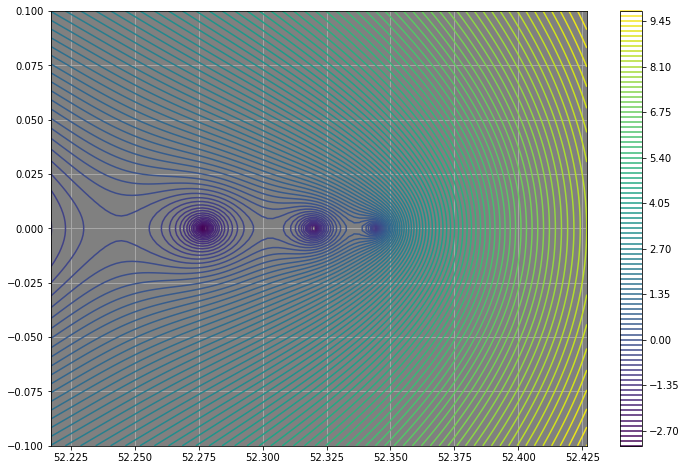

In [23]:
plotlogf(A.determinant, .997*k_low, 1.001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

In [27]:
guess = np.array(.9999 * k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (52.34458966542579-1.6806330877536188e-18j) . Residual of determinant:  2.1164042092782752e-13


# Bragg Exact Fields

In [28]:
Fs = A.all_fields(beta1, nu, outer)

In [29]:
Draw(1e-1*Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [38]:
Draw(1e-2*Fs['Etv'].real, A.mesh, vectors={'grid_size':120})

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [34]:
Draw(1e-1*Fs['Hz'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [36]:
Draw(1e-1*Fs['Hr'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene